# Analysis of ABCtoolbox results

## Create high resolution figures for publication
Based off of `ABC_results_AJ/chr1_AJmodels/assess_ABCtoolbox.ipynb`

- Figure 4: Prior, truncated prior, and posterior distribution of model 2 for inferred parameters.
- Figure 5: Joint posterior of effective population size of Western and Eastern AJ from model 2.

Originally executed on CyVerse Atmosphere instance

## Setup Code

In [1]:
import sys, os
sys.path.append('/vol_c/src/ABC_results_AJ/')
print(sys.executable)
print(sys.version)
print(sys.version_info)
print(sys.path)

/opt/anaconda3/bin/python
3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)
['', '/opt/anaconda3/lib/python36.zip', '/opt/anaconda3/lib/python3.6', '/opt/anaconda3/lib/python3.6/lib-dynload', '/opt/anaconda3/lib/python3.6/site-packages', '/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/agladstein/.ipython', '/vol_c/src/ABC_results_AJ/']


In [2]:
from sys import argv
import pandas as pd
# from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True, style="ticks")
import numpy as np
# import rpy2
# %load_ext rpy2.ipython

from functions.assessment_functions import *

/opt/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/opt/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Process Data

In [67]:
path = '/vol_c/ABC_AJmodels_instant_newreal/ReduceParams/PLS'
os.chdir(path)
abc_config_name = "test_ABC_estimate_PLS.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[BestSimsParamStats_name,
 MarginalPosteriorDensities_name,
 MarginalPosteriorCharacteristics_name,
 jointPosterior_name,
 MarginalPosteriorCharacteristics_reformat_name,
modelFit] = get_results_files(outputPrefix)
jointPosterior_name = '{}model0_jointPosterior_1_2_Obs0.txt'.format(outputPrefix)
print(BestSimsParamStats_name)
print(MarginalPosteriorDensities_name)
print(jointPosterior_name)
print(MarginalPosteriorCharacteristics_reformat_name)

test_ABC_estimate_PLS.txt
input_ABCtoolbox_M2_HPC_OSG_2.transformed_10pls.txt
ABC_M2_genome_estimate_1446124_10pls_1000ret_model0_BestSimsParamStats_Obs0.txt
ABC_M2_genome_estimate_1446124_10pls_1000ret_model0_MarginalPosteriorDensities_Obs0.txt
ABC_M2_genome_estimate_1446124_10pls_1000ret_model0_jointPosterior_1_2_Obs0.txt
ABC_M2_genome_estimate_1446124_10pls_1000ret_model0_MarginalPosteriorCharacteristicsReformat.txt


In [68]:
prior = pd.read_csv(simName, sep = '\t')
prior.head()

,sim,Asc_NAF,Asc_NEU,Asc_NCHB,daf,Log10_NAF,Log10_NANC,Log10_NCEU,Log10_NCHB,Log10_NWA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,5.281710e+14,14,17,8,0.052222,4.28044,4.00260,4.39113,4.26628,5.36560,...,1.125010,0.86040,2.423170,-1.240080,0.845003,-1.125590,0.981563,-3.112930,-2.369540,1.570150
1,5.281710e+14,8,4,14,0.053426,4.40487,3.58172,3.12320,4.21751,6.34165,...,10.571300,-7.41682,4.473280,-0.965474,4.215160,-0.527522,1.450910,-3.491500,-3.786360,2.616750
2,5.281710e+14,3,14,2,0.078333,3.92381,3.48373,3.09691,3.82373,3.28825,...,-5.533650,-3.17681,-4.261020,-1.686030,2.272880,1.961840,-1.393840,-0.596993,-0.301039,0.893576
3,5.291710e+14,7,3,7,0.072770,4.85489,4.37674,4.33554,4.87654,6.57905,...,-9.785690,4.81581,-0.450111,-0.057790,1.622090,-1.117200,-0.433007,0.778963,-0.293196,-0.013859
4,5.291710e+14,9,17,2,0.064633,4.90369,4.05652,3.63568,3.77291,5.50212,...,0.886967,4.40390,1.310930,1.441910,0.822246,-0.875576,0.238202,-4.099040,-1.115370,1.816170


In [69]:
param_indexes = get_param_indexes(params_str)
params = get_col_names(param_indexes, prior)

#### Reformat marginal posterior densities charecterisitcs file

In [70]:
df_chrs_reformat_pls = reformat_Characteristics(MarginalPosteriorCharacteristics_name)
df_chrs_reformat_pls

parsing ABC_M2_genome_estimate_1446124_10pls_1000ret_model0_MarginalPosteriorCharacteristics.txt


/vol_c/src/ABC_results_AJ/functions/assessment_functions.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_param['param'] = param


,mode,mean,median,q50_lower,q50_upper,q90_lower,q90_upper,q95_lower,q95_upper,q99_lower,q99_upper,HDI50_lower,HDI50_upper,HDI90_lower,HDI90_upper,HDI95_lower,HDI95_upper,HDI99_lower,HDI99_upper,param
0,3.896970,4.767290,4.737070,3.921840,5.583030,3.256730,6.395350,3.142440,6.532090,3.031990,6.662440,3.541920,5.173030,3.168180,6.297860,3.093430,6.478160,3.000000e+00,6.627300,Log10_NWA
0,6.181820,5.468760,5.523080,4.864730,6.095410,4.242090,6.540270,4.133790,6.612980,4.030180,6.680850,5.377310,6.522730,4.388310,6.659090,4.242090,6.700000,4.058270e+00,6.700000,Log10_NEA
0,3.035240,3.163130,3.108620,2.687500,3.575450,2.212130,4.334620,2.117960,4.596040,2.026560,5.107200,2.588200,3.464170,2.057510,4.094010,2.000000,4.334620,2.000000e+00,4.900730,Log10_NAg
0,5.606060,5.132760,5.232910,4.751430,5.604740,3.985470,5.906050,3.723350,5.950900,3.265910,5.989700,5.137750,5.893940,4.279320,6.000000,3.985470,6.000000,3.429700e+00,6.000000,Log10_NJ
0,5.666670,5.171610,5.269330,4.806390,5.633180,4.035550,5.915610,3.772150,5.956200,3.322300,5.990910,5.227190,5.954550,4.343070,6.000000,4.035550,6.000000,3.488080e+00,6.000000,Log10_NM
0,0.161617,0.480591,0.479492,0.241888,0.708293,0.060897,0.923113,0.033201,0.957956,0.007318,0.990672,0.106061,0.567655,0.035307,0.893939,0.015152,0.937385,8.852980e-07,0.981881,m
0,480.808000,631.471000,583.525000,490.971000,737.297000,421.011000,1006.750000,410.878000,1074.220000,402.259000,1161.400000,404.040000,587.481000,400.000000,915.638000,400.000000,1006.750000,4.000000e+02,1133.710000,TEM
0,28.727300,28.049100,28.105700,24.297900,31.712900,21.053500,35.041100,20.568400,35.498100,20.123500,35.894000,24.628100,32.040400,21.212100,35.198100,20.727300,35.649300,2.015270e+01,35.919200,TA
0,211.384000,331.163000,306.125000,174.280000,458.938000,58.993400,706.960000,41.014800,805.915000,25.247800,992.908000,98.343400,369.616000,21.000000,605.065000,21.000000,706.960000,2.100000e+01,919.858000,TMJ
0,14.929300,15.949100,15.638400,9.993740,21.515900,4.310280,28.996000,3.287670,30.867500,2.290680,33.156600,9.113640,20.585900,3.085260,27.373700,2.000000,28.996000,2.000000e+00,32.464500,TAEW


#### Priors, truncated, and posterior distributions


In [71]:
prior_pls = pd.read_csv(simName, sep = '\t')
prior_pls.head()

,sim,Asc_NAF,Asc_NEU,Asc_NCHB,daf,Log10_NAF,Log10_NANC,Log10_NCEU,Log10_NCHB,Log10_NWA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,5.281710e+14,14,17,8,0.052222,4.28044,4.00260,4.39113,4.26628,5.36560,...,1.125010,0.86040,2.423170,-1.240080,0.845003,-1.125590,0.981563,-3.112930,-2.369540,1.570150
1,5.281710e+14,8,4,14,0.053426,4.40487,3.58172,3.12320,4.21751,6.34165,...,10.571300,-7.41682,4.473280,-0.965474,4.215160,-0.527522,1.450910,-3.491500,-3.786360,2.616750
2,5.281710e+14,3,14,2,0.078333,3.92381,3.48373,3.09691,3.82373,3.28825,...,-5.533650,-3.17681,-4.261020,-1.686030,2.272880,1.961840,-1.393840,-0.596993,-0.301039,0.893576
3,5.291710e+14,7,3,7,0.072770,4.85489,4.37674,4.33554,4.87654,6.57905,...,-9.785690,4.81581,-0.450111,-0.057790,1.622090,-1.117200,-0.433007,0.778963,-0.293196,-0.013859
4,5.291710e+14,9,17,2,0.064633,4.90369,4.05652,3.63568,3.77291,5.50212,...,0.886967,4.40390,1.310930,1.441910,0.822246,-0.875576,0.238202,-4.099040,-1.115370,1.816170


In [72]:
truncated_pls = pd.read_csv(BestSimsParamStats_name, sep = '\t')
truncated_pls.head()

,Sim_num,Dist,Log10_NWA,Log10_NEA,Log10_NAg,Log10_NJ,Log10_NM,m,TEM,TA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,264,16.8687,5.20517,5.42928,4.31800,4.99100,5.99025,0.869358,977,26,...,-14.4694,0.878387,-5.08654,1.787270,3.31941,3.30940,1.75454,1.881890,-1.808710,-2.009360
1,1117,15.8772,4.36596,5.46680,3.82191,4.45352,5.73917,0.685668,956,28,...,-14.1798,0.576015,-4.30848,1.535540,2.54265,2.58288,1.78050,1.356290,0.131996,-2.163160
2,1178,15.7531,5.64311,6.42956,3.12808,5.21696,4.90679,0.809115,936,31,...,-13.6000,0.248529,-5.32594,0.187016,2.82822,3.45323,2.10797,0.942264,-1.200940,-2.999570
3,2635,13.8534,5.42171,5.37913,3.21827,5.00241,3.50297,0.561099,873,24,...,-12.5832,0.729135,-2.31277,1.542970,3.18700,2.62611,1.40639,1.475900,-0.904433,-0.654759
4,3373,16.4925,6.30811,4.77425,3.95823,5.45537,5.50558,0.503875,1041,21,...,-13.6125,-2.511240,-1.17663,2.896810,3.33754,4.47957,1.29533,2.474460,-0.298918,-1.051090


In [73]:
posterior_pls = pd.read_csv(MarginalPosteriorDensities_name, sep = '\t')
posterior_pls.head()

,number,Log10_NWA,Log10_NWA.density,Log10_NEA,Log10_NEA.density,Log10_NAg,Log10_NAg.density,Log10_NJ,Log10_NJ.density,Log10_NM,...,TEM,TEM.density,TA,TA.density,TMJ,TMJ.density,TAEW,TAEW.density,Tm,Tm.density
0,1,3.00000,0.150884,4.00000,0.159277,2.00000,0.185842,3.00000,0.012729,3.00000,...,400.000,0.002214,20.0000,0.039569,21.000,0.001177,2.00000,0.016569,3.00000,0.001805
1,2,3.03737,0.163865,4.02727,0.170944,2.04706,0.207092,3.03030,0.014008,3.03030,...,408.081,0.002348,20.1616,0.042190,32.899,0.001266,2.32323,0.017992,3.32323,0.002031
2,3,3.07475,0.176863,4.05455,0.182312,2.09411,0.229528,3.06061,0.015333,3.06061,...,416.162,0.002473,20.3232,0.044721,44.798,0.001353,2.64646,0.019426,3.64646,0.002281
3,4,3.11212,0.189759,4.08182,0.193289,2.14117,0.253053,3.09091,0.016699,3.09091,...,424.242,0.002588,20.4848,0.047140,56.697,0.001435,2.96970,0.020861,3.96970,0.002559
4,5,3.14949,0.202440,4.10909,0.203800,2.18823,0.277543,3.12121,0.018107,3.12121,...,432.323,0.002690,20.6465,0.049426,68.596,0.001513,3.29293,0.022285,4.29293,0.002866


## Figure 4: Prior, truncated prior, and posterior distribution

In [74]:
def plot_param_densities_highres(posterior, truncated, prior, df_chrs_reformat, param):
    """
    Use matplotlib and seaborn to plot prior, truncated, and posterior distributions of parameter.
    :param posterior: dataframe of ABCtoolbox *MarginalPosteriorDensities_Obs0.txt
    :param truncated: dataframe of ABCtoolbox *BestSimsParamStats_Obs0.txt
    :param prior: dataframe of simulation input for ABCtoolbox
    :param param: string parameter name, which is the column name in the dataframes
    """
        
    mode = float(df_chrs_reformat['mode'].loc[df_chrs_reformat['param'] == param])
    HDI90_lower = float(df_chrs_reformat['HDI90_lower'].loc[df_chrs_reformat['param'] == param])
    HDI90_upper = float(df_chrs_reformat['HDI90_upper'].loc[df_chrs_reformat['param'] == param])

    sns.set(font_scale=3)
    sns.set_style("white")
    plt.figure(figsize=(9,6))
    plt.xlabel(param);
    plt.plot(posterior[param], posterior['{}.density'.format(param)],label='_nolegend_', linewidth=3.0);
    sns.kdeplot(truncated[param], label='_nolegend_', linewidth=3.0);
    sns.kdeplot(prior[param], color='grey', label='_nolegend_', linewidth=3.0);
    ymin, ymax = plt.ylim()
    plt.vlines(mode, ymin, ymax, colors='black', linewidth=3.0);
    plt.vlines(HDI90_lower, ymin, ymax, colors='black', linestyle='dotted', linewidth=3.0);
    plt.vlines(HDI90_upper, ymin, ymax, colors='black', linestyle='dotted', linewidth=3.0);
    plt.tight_layout()
    plt.savefig(str(param)+'_posterior.jpeg', dpi = 300)
    
    return

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


TypeError: cannot convert the series to <class 'float'>

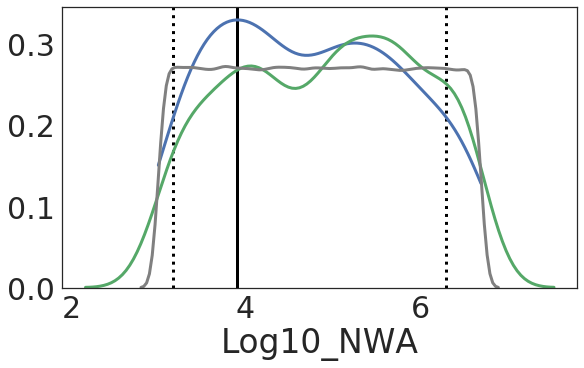

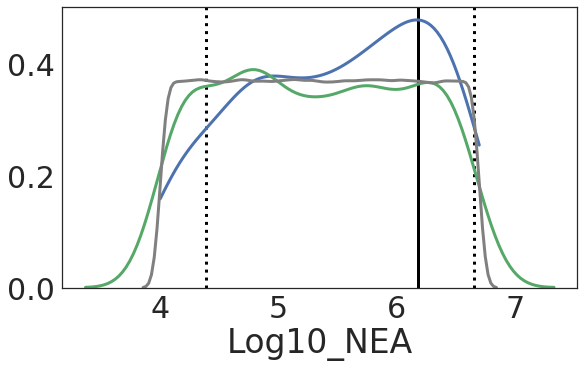

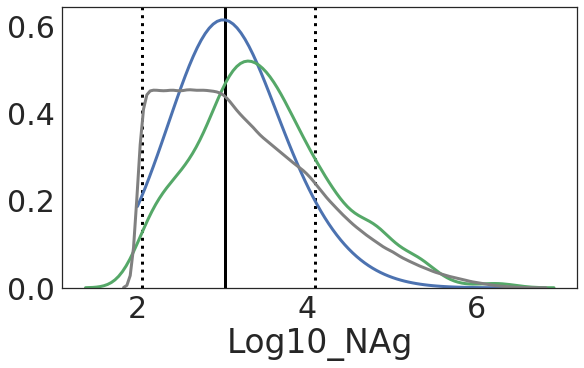

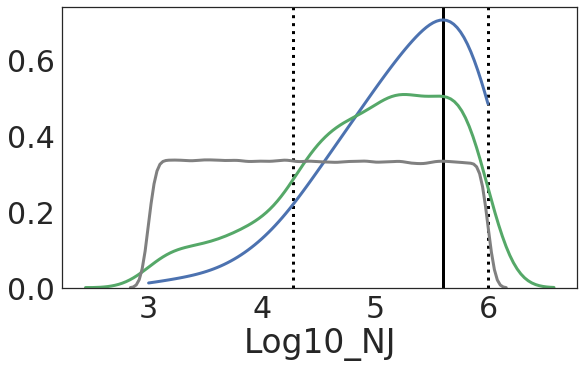

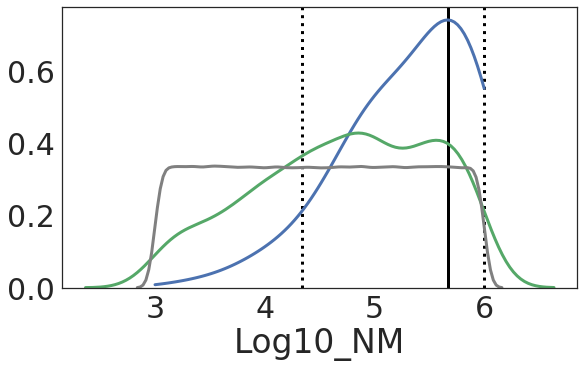

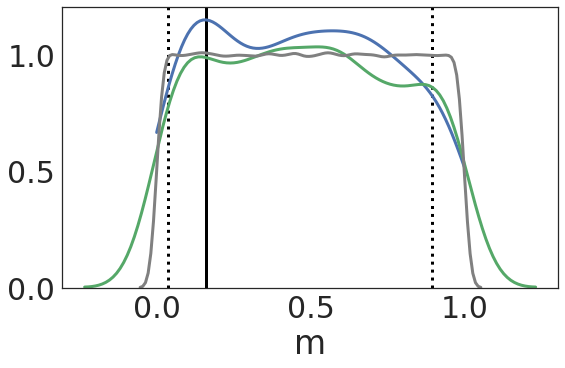

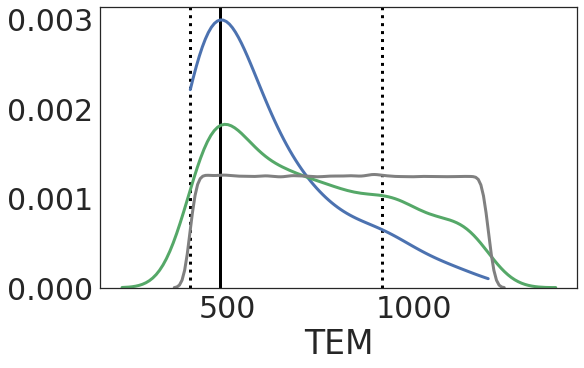

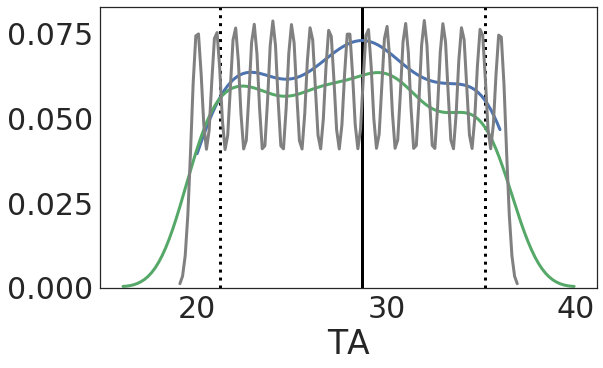

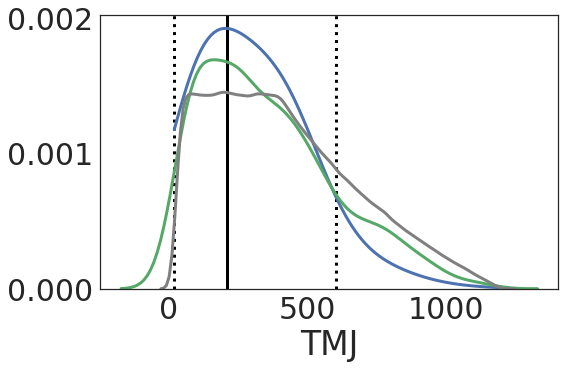

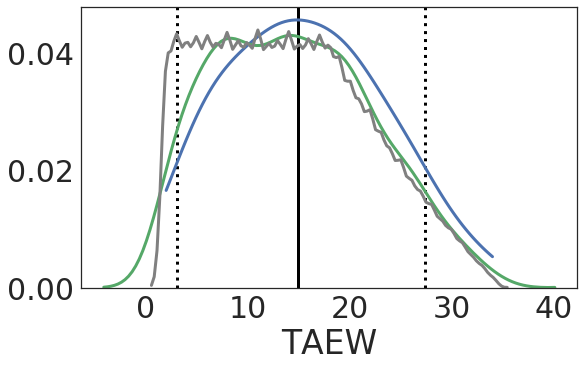

In [81]:
for param in params:
    plot_param_densities_highres(posterior_pls, truncated_pls, prior_pls, df_chrs_reformat_pls, param)

## Figure 5: Joint density plot

Create joint density dataframe

In [77]:
joint_NEA_NWA_df_pls = create_joint_df(jointPosterior_name)
joint_NEA_NWA_df_pls.head()

,number,Log10_NWA,Log10_NEA,density,HDI
0,0,3.00000,4.0,3.01049,0.998815
1,1,3.03737,4.0,3.17933,0.998333
2,2,3.07475,4.0,3.33231,0.997484
3,3,3.11212,4.0,3.46747,0.996770
4,4,3.14949,4.0,3.58347,0.995871


In [128]:
def plot_joint_mtpltlb_highres(joint_NEA_NWA_df, df_chrs_reformat):
    # density map
    NWA, NEA, z = joint_NEA_NWA_df['Log10_NWA'], joint_NEA_NWA_df['Log10_NEA'], joint_NEA_NWA_df['density']
    NWA = np.unique(NWA)
    NEA = np.unique(NEA)
    X, Y = np.meshgrid(NWA, NEA)
    Z = z.reshape(len(NEA), len(NWA))
    plt.pcolormesh(X, Y, Z, cmap='viridis')
    colorbar = plt.colorbar()
    colorbar.set_label('Density')

    # Scatterplot point
    NEA_mode = df_chrs_reformat.loc[df_chrs_reformat['param'] == 'Log10_NEA']['mode']
    NWA_mode = df_chrs_reformat.loc[df_chrs_reformat['param'] == 'Log10_NWA']['mode']
    plt.scatter(NWA_mode, NEA_mode, marker='*', facecolor='black', edgecolor='none', s = 200)

    # y = x line
    plt.plot(NWA, NWA, color='black')
    
    # Axes limits and labels
    plt.xlim(np.min(NWA), np.max(NWA))
    plt.xlabel('$\log_{10}$ NWA')

    plt.ylabel('$\log_{10}$ NEA')
    plt.ylim(min(NEA), max(NEA))
    plt.savefig('joint_posterior.jpeg', dpi = 300, bbox_inches="tight")
    return

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


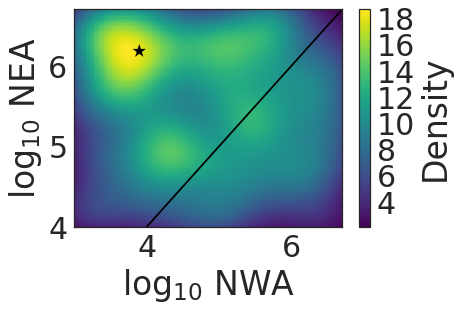

In [129]:
plot_joint_mtpltlb_highres(joint_NEA_NWA_df_pls, df_chrs_reformat_pls)